In [333]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [334]:
PATH = 'data/'
df = pd.read_csv(PATH+'sonar-all-data.csv', header=None)
df.columns = [f'feat_{col}' if col!=60 else 'target' for col in df.columns]
df['target'] = df['target'].map({'M': 1, 'R': 0})

In [326]:
# X, y = df.drop(columns='target'), df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# X_train.shape[0], X_test.shape[0], X_val.shape[0]

In [335]:
X, y = df.drop(columns='target'), df['target']
X_full, X_val, y_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.25, random_state=42)
X_train.shape[0], X_test.shape[0], X_val.shape[0]

(124, 42, 42)

In [336]:
clf = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9516129032258065, 0.7380952380952381)

In [337]:
trees_num = np.arange(1, 500, 20, dtype=int) # range(1,500,5)
clfs = [RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train, y_train) for n in trees_num]
# scores_train = [clf.score(X_train, y_train) for clf in clfs]
# scores_test = [clf.score(X_test, y_test) for clf in clfs]
scores_train = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
scores_test = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

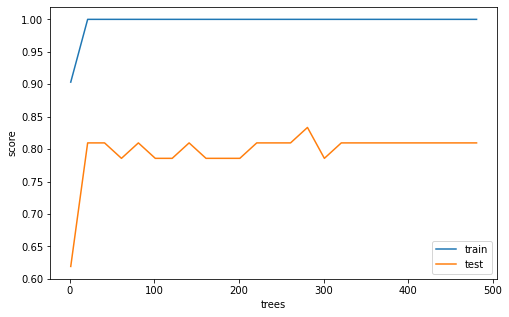

In [338]:
plt.figure(figsize=(8,5))
plt.plot(trees_num, scores_train, label='train')
plt.plot(trees_num, scores_test, label='test')
plt.xlabel('trees')
plt.ylabel('score')
plt.legend();

In [357]:
clf = RandomForestClassifier(n_estimators=30, criterion='gini', random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8809523809523809)

In [358]:
clf = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8095238095238095)

In [371]:
clf = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=9, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8809523809523809)

In [397]:
clf = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=9, 
                             min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8809523809523809)

In [404]:
clf = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=9, 
                             min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8809523809523809)

In [405]:
clf = RandomForestClassifier(n_estimators=32, criterion='entropy', max_depth=9, 
                             min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8095238095238095)

In [406]:
clf = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=9, 
                             min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8809523809523809)

In [407]:
clf = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=9, 
                             min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.8095238095238095

In [408]:
grid = {
    'criterion': ['gini','entropy'], 
    'n_estimators': [2,6,10,20,30],
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,5,8],
    'min_samples_leaf': [1,2,3]
}

cv = GridSearchCV(clf, grid, scoring='accuracy', cv=3)
cv.fit(X_full, y_full)
cv.best_estimator_, cv.best_score_

(RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=20,
                        random_state=42),
 0.8435064935064934)

In [409]:
grid = {
    'criterion': ['gini','entropy'], 
    'n_estimators': [2,6,10,20,30],
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,5,8],
    'min_samples_leaf': [1,2,3]
}

cv = RandomizedSearchCV(clf, grid, scoring='accuracy', cv=3)
cv.fit(X_full, y_full)
cv.best_estimator_, cv.best_score_

(RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                        min_samples_split=5, n_estimators=20, random_state=42),
 0.8135281385281385)